In [8]:
import pandas as pd
df = pd.read_csv('data/2023_03_07_00_55_06/result.csv', header=None, names=['idx', 'loss-type', 'N', 'noise-type', 'alpha', 'an-size', 'weight', 'r_e'])

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']# 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False
# def plot_log(x, y, label=None, title=None, xlabele=None, ylabele=None):


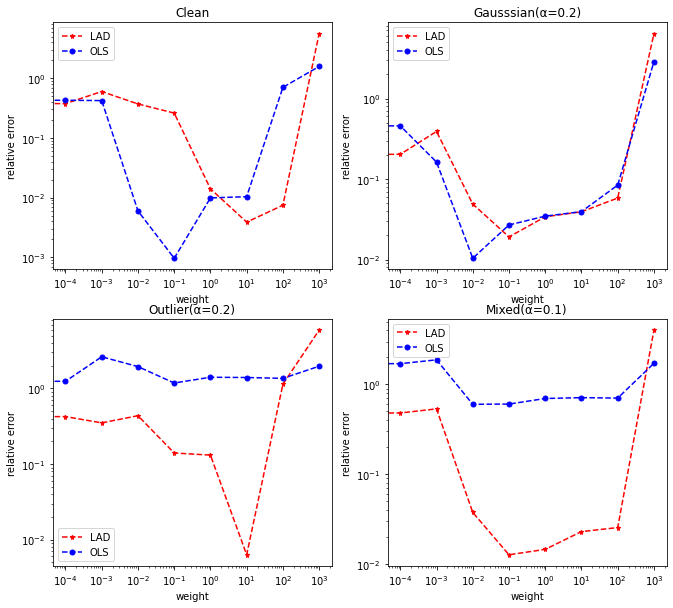

In [39]:
plt.figure(102, [11, 10])
i = 1
for name in ['none', 'normal', 'outlinear']:
    plt.subplot(2, 2, i)
    if name == 'outlinear':
        df_L1 = df.loc[df['noise-type'] == name].loc[df['alpha'] == 0].loc[df['loss-type'] == 'l1']
        df_L2 = df.loc[df['noise-type'] == name].loc[df['alpha'] == 0].loc[df['loss-type'] == 'square']
        plt.loglog(df_L1['weight'], df_L1['r_e'], 'r--', marker='*', markersize=5, markerfacecolor='red', label='LAD')
        plt.loglog(df_L2['weight'], df_L2['r_e'], 'b--', marker='o', markersize=5, markerfacecolor='blue', label='OLS')
        plt.xlabel('weight')
        plt.ylabel('relative error')
        plt.title('Outlier(α=0.2)')
        plt.legend()
        plt.subplot(2, 2, 4)
        df_L1 = df.loc[df['noise-type'] == name].loc[df['alpha'] != 0].loc[df['loss-type'] == 'l1']
        df_L2 = df.loc[df['noise-type'] == name].loc[df['alpha'] != 0].loc[df['loss-type'] == 'square']
        plt.loglog(df_L1['weight'], df_L1['r_e'], 'r--', marker='*', markersize=5, markerfacecolor='red', label='LAD')
        plt.loglog(df_L2['weight'], df_L2['r_e'], 'b--', marker='o', markersize=5, markerfacecolor='blue', label='OLS')
        plt.xlabel('weight')
        plt.ylabel('relative error')
        plt.title('Mixed(α=0.1)')
        plt.legend()
    else:
        df_L1 = df.loc[df['noise-type'] == name].loc[df['loss-type'] == 'l1']
        df_L2 = df.loc[df['noise-type'] == name].loc[df['loss-type'] == 'square']
        plt.loglog(df_L1['weight'], df_L1['r_e'], 'r--', marker='*', markersize=5, markerfacecolor='red', label='LAD')
        plt.loglog(df_L2['weight'], df_L2['r_e'], 'b--', marker='o', markersize=5, markerfacecolor='blue', label='OLS')
        plt.xlabel('weight')
        plt.ylabel('relative error')
        if name == 'none':
            title = 'Clean'
        else:
            title = 'Gausssian(α=0.2)'
        plt.title(title)
        plt.legend()
    i += 1
plt.savefig('data/weightVS.png')